In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
data.duplicated().sum()

np.int64(1)

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


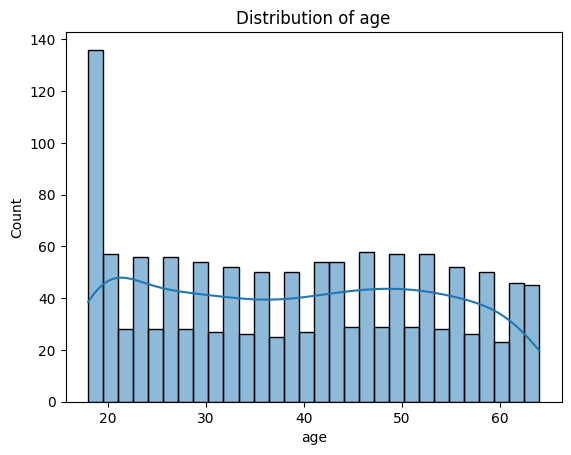

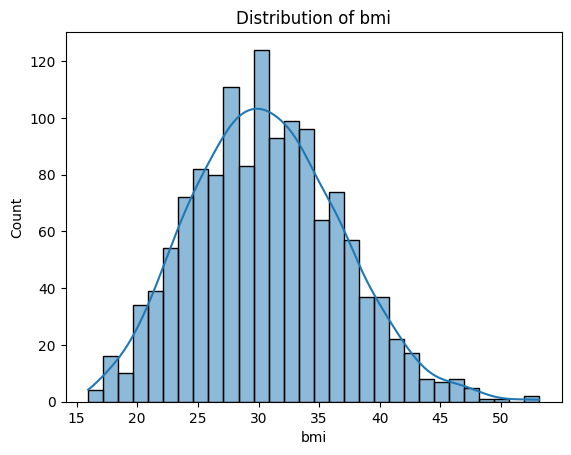

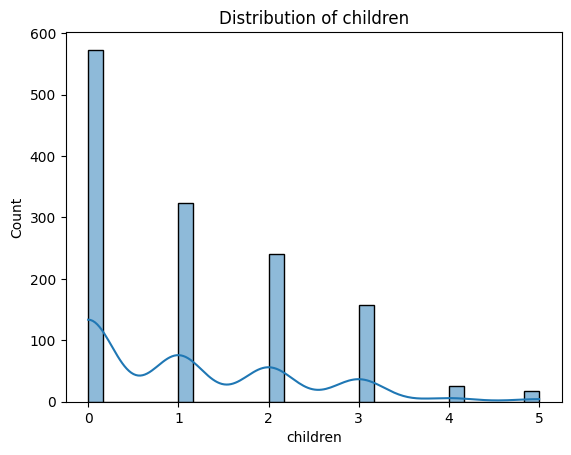

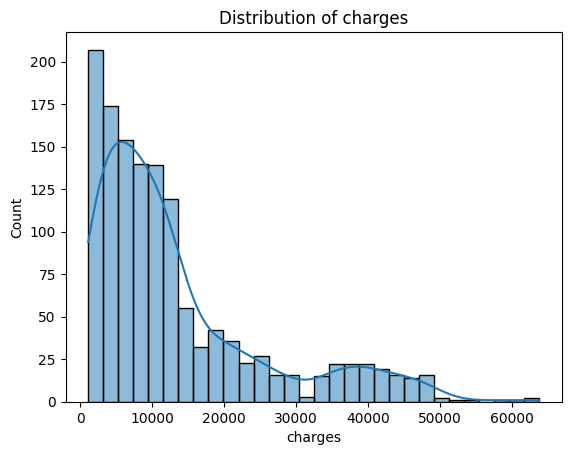

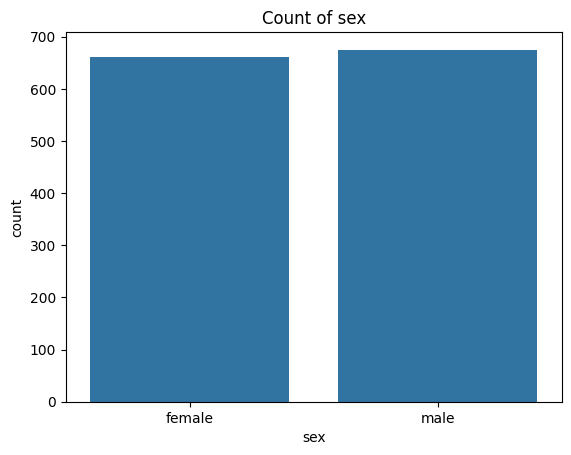

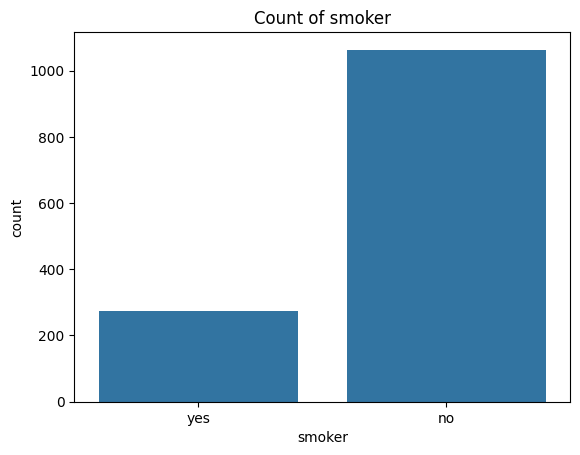

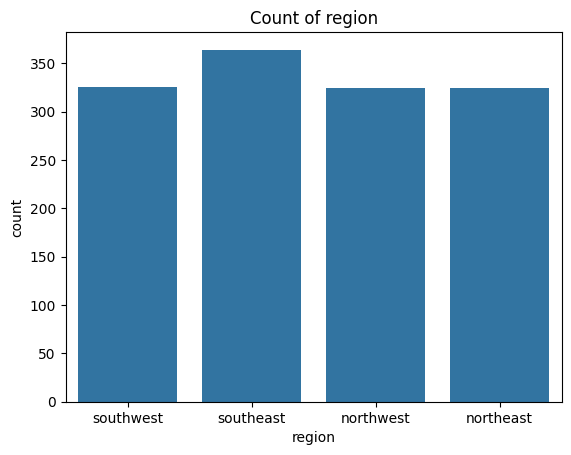

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical = ["age", "bmi", "children", "charges"]

for col in numerical:
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

categorical = ["sex", "smoker", "region"]

for col in categorical:
    sns.countplot(x=col, data=data)
    plt.title(f"Count of {col}")
    plt.show()


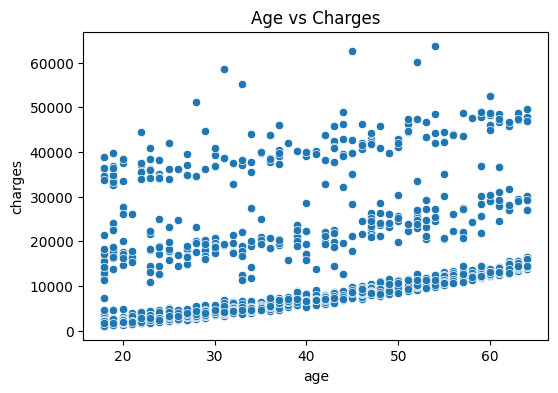

In [12]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges", data=data)
plt.title("Age vs Charges")
plt.show()


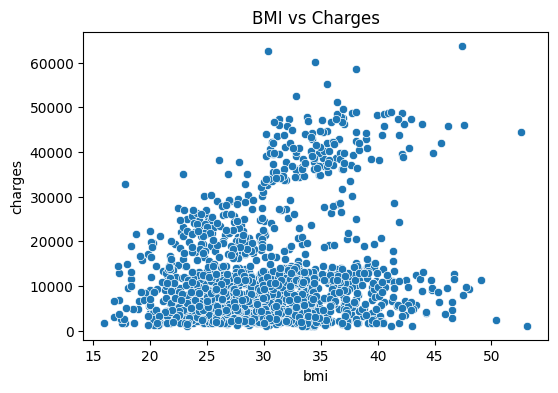

In [13]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges", data=data)
plt.title("BMI vs Charges")
plt.show()


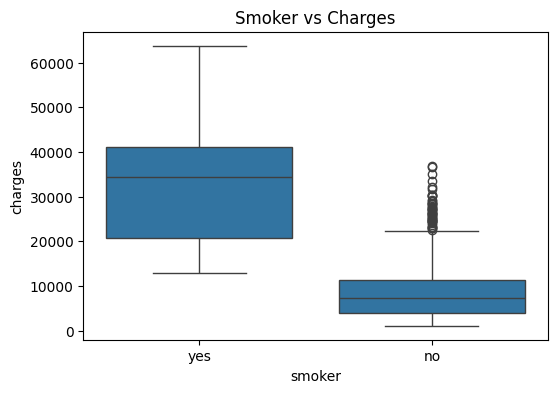

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=data)
plt.title("Smoker vs Charges")
plt.show()


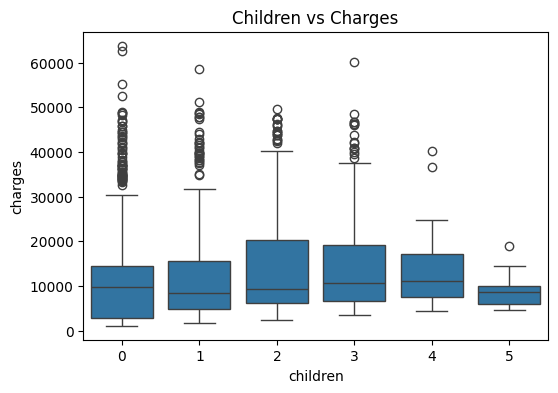

In [15]:
plt.figure(figsize=(6,4))
sns.boxplot(x="children", y="charges", data=data)
plt.title("Children vs Charges")
plt.show()


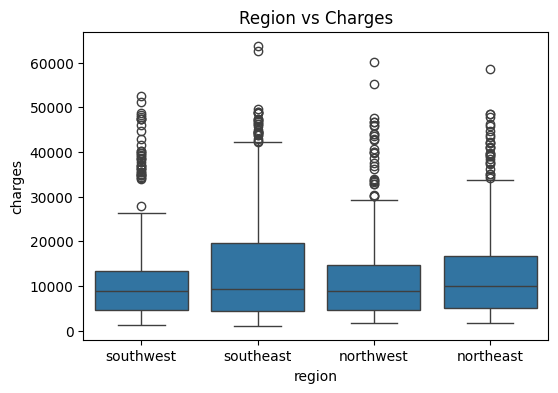

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(x="region", y="charges", data=data)
plt.title("Region vs Charges")
plt.show()


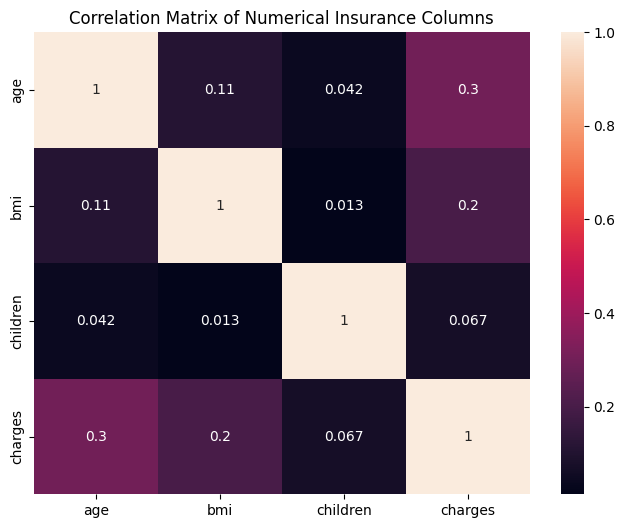

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


numerical_data = data.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_data.corr(), annot=True,)
plt.title("Correlation Matrix of Numerical Insurance Columns")
plt.show()

In [18]:
data_new = data.drop(["sex", "region"], axis=1)

In [19]:
data_new.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

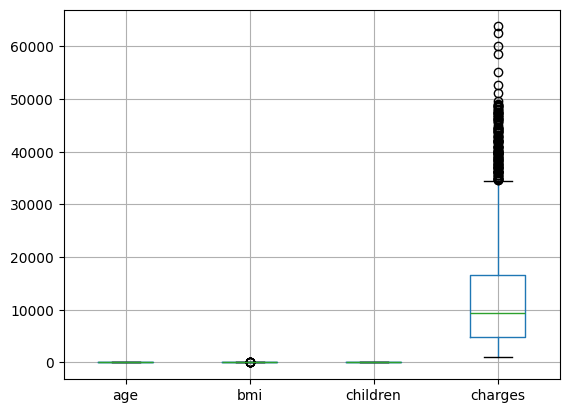

In [20]:
data_new.boxplot()

In [21]:
data_new.select_dtypes("number").skew().sort_values(ascending=False)

,0
charges,1.515391
children,0.937421
bmi,0.283914
age,0.054781


In [22]:
data_new["charges"] = np.log(data_new["charges"])

<Axes: >

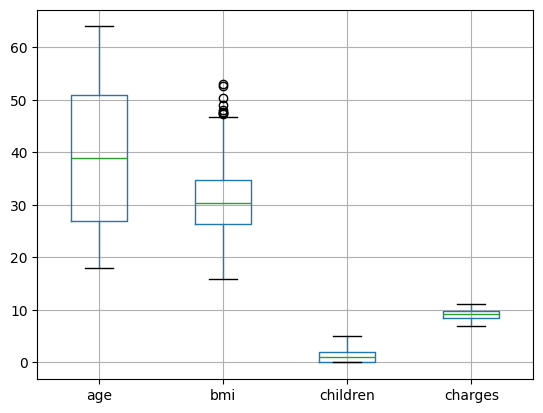

In [23]:
data_new.boxplot()

In [24]:
data_new.select_dtypes("number").skew().sort_values(ascending=False)

,0
children,0.937421
bmi,0.283914
age,0.054781
charges,-0.089839


In [25]:
print(data_new)
data_encoded = pd.get_dummies(data_new, drop_first=True)
print(data_encoded)



      age     bmi  children smoker    charges
0      19  27.900         0    yes   9.734176
1      18  33.770         1     no   7.453302
2      28  33.000         3     no   8.400538
3      33  22.705         0     no   9.998092
4      32  28.880         0     no   8.260197
...   ...     ...       ...    ...        ...
1333   50  30.970         3     no   9.268661
1334   18  31.920         0     no   7.698927
1335   18  36.850         0     no   7.396233
1336   21  25.800         0     no   7.604867
1337   61  29.070         0    yes  10.279914

[1337 rows x 5 columns]
      age     bmi  children    charges  smoker_yes
0      19  27.900         0   9.734176        True
1      18  33.770         1   7.453302       False
2      28  33.000         3   8.400538       False
3      33  22.705         0   9.998092       False
4      32  28.880         0   8.260197       False
...   ...     ...       ...        ...         ...
1333   50  30.970         3   9.268661       False
1334   18  31.9

In [26]:
data_encoded["smoker_yes"] = data_encoded["smoker_yes"].astype(int)
data_encoded

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,9.734176,1
1,18,33.770,1,7.453302,0
2,28,33.000,3,8.400538,0
3,33,22.705,0,9.998092,0
4,32,28.880,0,8.260197,0
...,...,...,...,...,...
1333,50,30.970,3,9.268661,0
1334,18,31.920,0,7.698927,0
1335,18,36.850,0,7.396233,0
1336,21,25.800,0,7.604867,0


In [27]:
from sklearn.model_selection import train_test_split


X = data_encoded.drop("charges", axis=1)
y = data_encoded["charges"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (1069, 4)
Test shape: (268, 4)


In [28]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [30]:
y_pred = model.predict(X_test_scaled)


In [31]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 0.16730511231371498
R² Score: 0.8197492921430933


In [33]:

coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)


      Feature  Coefficient
3  smoker_yes     0.610111
0         age     0.478826
2    children     0.119561
1         bmi     0.064825
